## Main Objective
The main objective is to develop a Book Recommendation System based on ratings and content information.  
A Book Recommendation System is a data-driven application that suggests books to users based on their preferences and behaviour.   
It aims to enhance user experience by providing personalized book recommendations, thereby increasing user engagement and satisfaction.   

### Data Understanding
The dataset has the following features:
1. **bookID**: A unique identifier for each book.
2. **title**: The title of the book.
3. **authors**: The author(s) of the book.
4. **average_rating**: The average rating of the book, indicating user satisfaction with the book.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [4]:
dataset = pd.read_csv("datasets/books_data.csv")

In [5]:
dataset.head()

,bookID,title,authors,average_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78


In [6]:
dataset.isnull().sum()

bookID            0
title             0
authors           0
average_rating    0
dtype: int64

In [7]:
dataset.shape

(11127, 4)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


In [29]:
# Convert 'average_rating' to a numeric data type
dataset['average_rating'] = pd.to_numeric(dataset['average_rating'], errors='coerce')

In [32]:
# Keep only rows where 'average_rating' contains valid numeric values
df_cleaned = dataset[dataset['average_rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

### Exploratory Data Analysis
#### How is the overall distribution of average ratings across all books?

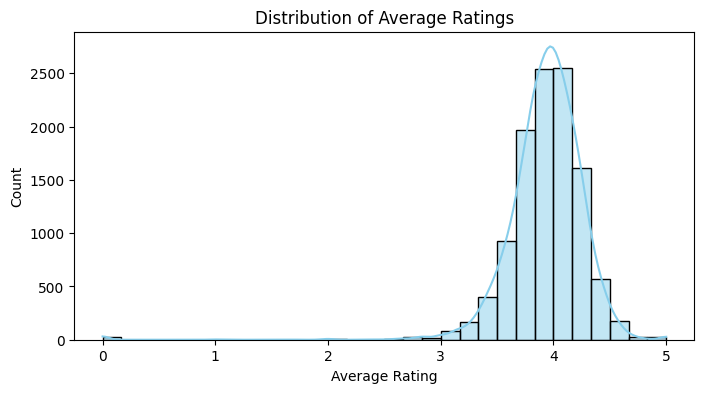

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['average_rating'], bins=30, kde=True, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Average Ratings')
plt.show()

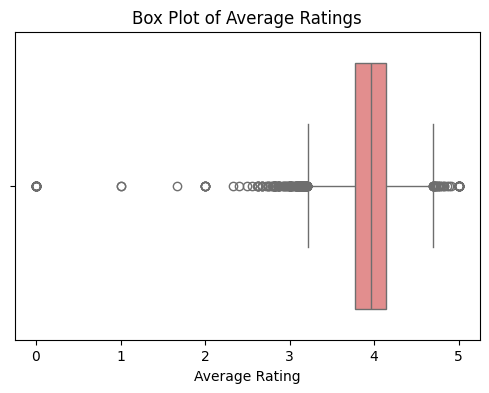

In [36]:
# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['average_rating'], color='lightcoral')
plt.xlabel("Average Rating")
plt.title("Box Plot of Average Ratings")
plt.show()

> TThe left skew suggests that fewer books received extremely low ratings (0–2.5), implying that users tend to rate books positively more often than negatively. This can indicate a bias in user ratings, people who dislike a book might not rate it at all.  
Outliers from 0 to 3 may represent books with low popularity, controversial books, or books with fewer reviews. Since the range from 4.6 to 5 contains outliers, it means a small group of books is consistently rated highly, which could be useful for identifying top recommendations.

#### Which books stand out as exceptionally high or low in rating, and what unique characteristics (e.g., title patterns or specific authors) do they share?

In [37]:
# Find max and min rating values
max_rating = df_cleaned["average_rating"].max()
min_rating = df_cleaned["average_rating"].min()

# Get all books with the highest rating
highest_rated_books = df_cleaned[df_cleaned["average_rating"] == max_rating]

# Get all books with the lowest rating
lowest_rated_books = df_cleaned[df_cleaned["average_rating"] == min_rating]

In [38]:
print(f"Number of books with highest rating {max_rating} is: {highest_rated_books.shape[0]}")
print(f"Number of books with lowest rating {min_rating} is: {lowest_rated_books.shape[0]}")

Number of books with highest rating 5.0 is: 22
Number of books with lowest rating 0.0 is: 25


In [39]:
highest_rated_books.head()

,bookID,title,authors,average_rating
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0
4126,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0


In [40]:
lowest_rated_books.head()

,bookID,title,authors,average_rating
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0
987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0


#### Are certain authors consistently appearing in the highest or lowest-rated books?

In [41]:
# Count appearances of authors in each group
high_authors_count = highest_rated_books["authors"].value_counts()
low_authors_count = lowest_rated_books["authors"].value_counts()

In [42]:
# Display results
print("Authors appearing most in highest-rated books:")
high_authors_count.head(5)

Authors appearing most in highest-rated books:


authors
NOT A BOOK                             2
Aristophanes/F.W. Hall/W.M. Geldart    1
Ross Garnaut                           1
Sheri Rose Shepherd                    1
James E. Campbell                      1
Name: count, dtype: int64

In [43]:
print("Authors appearing most in lowest-rated books:")
low_authors_count.head(5)

Authors appearing most in lowest-rated books:


authors
Frederick P. Lenz             2
Lonely Planet/Mark Honan      1
Apollodorus/Richard Wagner    1
Warren G. Bennis              1
James Craig Holte             1
Name: count, dtype: int64

> All the authors amongst top rating books are unique ones!  
> Only 'Frederick P.Lenz' have been amongst the lowest rating authors twice! Others have only appeared once!

#### Are there common words or phrases among top-rated books?

In [44]:
# Function to clean and tokenize titles
def tokenize_title(title):
    title = str(title).lower()  # Convert to lowercase
    title = re.sub(r'[\(\)]', '', title)  # Remove parentheses
    title = re.sub(r'/', ' ', title)  # Replace slashes with space
    title = re.sub(r'[^a-z\s]', '', title)  # Remove any remaining non-alphabetic characters
    words = title.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words


In [45]:
# Apply tokenization to top-rated book titles
# Make a copy to avoid SettingWithCopyWarning
highest_rated_books = highest_rated_books.copy()
highest_rated_books['title_tokens'] = highest_rated_books['title'].apply(tokenize_title)

In [46]:
highest_rated_books.head()

,bookID,title,authors,average_rating,title_tokens
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,"[comoediae, acharenses, equites, nubes, vespae..."
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,"[willem, de, kooning, late, paintings]"
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,"[literature, circle, guide, bridge, terabithia..."
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,"[middlesex, borough, images, america, new, jer..."
4126,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,"[zone, enders, nd, runner, official, strategy,..."


In [21]:
# Flatten list of all words in top-rated books
all_words = [word for tokens in highest_rated_books['title_tokens'] for word in tokens]

In [22]:
# Count word frequency
word_freq = Counter(all_words)

In [23]:
# Display the most common words
print("Most common words in top-rated books:")
print(word_freq.most_common(20))  # Show top 20 most frequent words

Most common words in top-rated books:
[('literature', 3), ('paintings', 2), ('guide', 2), ('america', 2), ('new', 2), ('color', 2), ('theory', 2), ('goon', 2), ('show', 2), ('volume', 2), ('fallen', 2), ('critical', 2), ('commentary', 2), ('nicholas', 2), ('evans', 2), ('comoediae', 1), ('acharenses', 1), ('equites', 1), ('nubes', 1), ('vespae', 1)]


#### Are there common words or phrases among low-rated books?

In [24]:
# Apply tokenization to top-rated book titles
# Make a copy to avoid SettingWithCopyWarning
lowest_rated_books = lowest_rated_books.copy()
lowest_rated_books['title_tokens'] = lowest_rated_books['title'].apply(tokenize_title)

In [25]:
all_words_lowest_rated = [word for tokens in lowest_rated_books['title_tokens'] for word in tokens]

In [26]:
# Count word frequency
word_freq_lowest = Counter(all_words_lowest_rated)

In [27]:
print("Most common words in top-rated books:")
print(word_freq_lowest.most_common(20))  # Show top 20 most frequent words

Most common words in top-rated books:
[('guide', 3), ('eat', 2), ('talks', 2), ('meditation', 2), ('american', 2), ('apollodori', 2), ('night', 2), ('fantastic', 2), ('london', 1), ('lonely', 1), ('planet', 1), ('juiced', 1), ('official', 1), ('strategy', 1), ('open', 1), ('city', 1), ('woman', 1), ('ever', 1), ('left', 1), ('meditate', 1)]


#### What is the frequency distribution of books per author, and which authors are most prominent in the dataset?